# Problem:


Employee attrition or turnover and its impact on the business are well known. Some of the HR thought leaders have defined the cost of replacing an employee and for India its been recently pegged at INR 60 Million.
Employee turnover is perplexing, frustrating – and costly. Very costly.


### Why Employee Retention Is Important?

1.The hiring process isn’t easy. Think of all the steps involved whenever a position must be filled:
   - Updating and posting a job description
   - Reviewing resumes
   - Screening and interviewing
   - Checking references
   - Extending a job offer
   - Running a background check
   - Completing legal paperwork
   - Notifying rejected candidate
   - Onboarding your new hire
   
2.Turnover expenses are higher than you may think. SHRM estimates that replacing an entry-level employee costs 50 percent of their annual salary. That figure rises to as much as 250 percent when replacing leaders or highly skilled employees. A key part of this expense is onboarding, the critical process of helping a new employee learn their job and fit into their new company culture. This calculator tool can help you determine the onboarding cost for a new hire in your firm.

3.Losing people means losing knowledge. Whether you call it institutional knowledge, enterprise knowledge, or something else, important information and skills can be lost forever if experienced employees leave without thoroughly transferring their knowledge to others.

4.Teamwork is tougher with high turnover. Employees can have a hard time bonding with each other and working productively together if team members keep leaving. And it’s a drain on remaining employees to have to keep training new hires.

5.Your loss may be a competitor’s gain. Employees who leave your organization may go work for a competitor who will benefit from their skills and potential—assets you have lost.




##### A recent study done in U.S says that:
- 11 billion dollar is lost annually due to employee turnover (Bloomberg BNA)
- Millennial turnover costs the U.S. economy 30.5 billion dolar annually (Gallup)
- Cost of replacing entry level employees: 30-50% of their annual salary (ERE Media)
- Cost of replacing mid-level employees: 150% of their annual salary (ERE Media)
- Cost of replacing high-level or highly specialized employees: 400% of their annual salary (ERE Media)

## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [19]:
#import dataset
data=pd.read_csv('Human_Resources_Employee_Attrition.csv')
print(data.shape)
data.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Types of columns
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### A.    Checking missing values

In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

- There is no missing values in any column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_of_projects       14999 non-null int64
average_monthly_hours    14999 non-null int64
years_at_company         14999 non-null int64
work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### B.    Exploratory Data Analysis

#### 1.Display descriptive stats for employees

In [6]:
# Display descriptive stats for employees
data.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### % of employees left organisation


In [7]:
print(data['left'].value_counts()/len(data))

0    0.761917
1    0.238083
Name: left, dtype: float64


In [8]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


- Here mean of satisfaction is less when compared to mean of unsatisfied ones.
- Here we can see that promotion in last 5 years rate of employees who left organization was too low as compared to who do not left.

In [9]:
data.groupby('left').max()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,1.00,1.0,6,287,10,1,1,technical,medium
1,0.92,1.0,7,310,6,1,1,technical,medium


- Here we can see that employees with high satisfaction level(0.92) have left organization.
    - (i) So we can say that that employee might have got better opertunity in other company.
- Here we can see that employees who has worked for 6 years has also left organization.
- Here we can see that employees who left organization worked was working for 310 hrs which is much more than average working hours   which can also be the reason why he left.

In [10]:
data.groupby('left')['salary'].value_counts()

left  salary
0     low       5144
      medium    5129
      high      1155
1     low       2172
      medium    1317
      high        82
Name: salary, dtype: int64

- From this we can say that low salary employees are the one who left the organization most of the time.

In [11]:
data.groupby('left')['department'].value_counts()

left  department 
0     sales          3126
      technical      2023
      support        1674
      IT              954
      product_mng     704
      RandD           666
      marketing       655
      accounting      563
      management      539
      hr              524
1     sales          1014
      technical       697
      support         555
      IT              273
      hr              215
      accounting      204
      marketing       203
      product_mng     198
      RandD           121
      management       91
Name: department, dtype: int64

- From above data we can say that Sales is the dept. in which employees left the organization most of the time.

In [12]:
data.groupby('left')['number_of_projects'].value_counts()

left  number_of_projects
0     3                     3983
      4                     3956
      5                     2149
      2                      821
      6                      519
1     2                     1567
      6                      655
      5                      612
      4                      409
      7                      256
      3                       72
Name: number_of_projects, dtype: int64

- So from above data we can not say that employees who is having more work load is leaving company.
- Leaving job is independent of work load.

In [13]:
data[data['left']==1].groupby('left')['average_monthly_hours'].value_counts()

left  average_monthly_hours
1     135                      75
      156                      62
      151                      58
      127                      57
      145                      54
                               ..
      178                       1
      188                       1
      196                       1
      203                       1
      204                       1
Name: average_monthly_hours, Length: 164, dtype: int64

- Leaving job is also independent of work no. of hours.

In [14]:
data.groupby('left')['promotion_last_5years'].value_counts()

left  promotion_last_5years
0     0                        11128
      1                          300
1     0                         3552
      1                           19
Name: promotion_last_5years, dtype: int64

- From above data we can say that employees who are not getting promoted from last 5 years  left the organization most of the time.

In [15]:
data.groupby('left')['years_at_company'].value_counts()

left  years_at_company
0     3                   4857
      2                   3191
      4                   1667
      5                    640
      6                    509
      10                   214
      7                    188
      8                    162
1     3                   1586
      4                    890
      5                    833
      6                    209
      2                     53
Name: years_at_company, dtype: int64

- From the above data we can see that people who are working from last 4,5 and 6 years are also leaving which is not good for company.
- This increases expenditure of company by:
   - Cost of hiring
   - Loss of productivity(new person takes to time to reach productivity of existing employee)

### 2.Correlation and Heatmap

In [16]:
# check correlation(if exists)
data.corr(method='spearman')

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_of_projects,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_monthly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
years_at_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


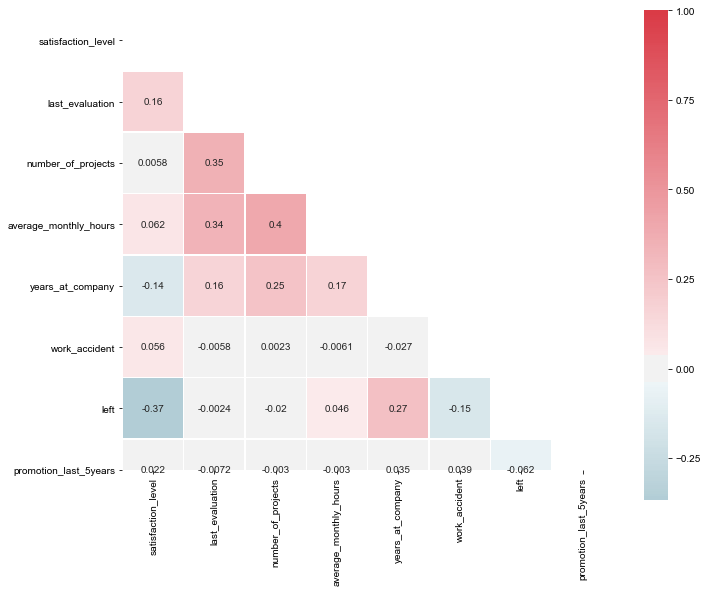

In [17]:
# Compete the correlation matrix
corr =data.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sb.heatmap(corr, mask=mask, cmap=cmap, center=0.0,
                      vmax = 1, square=True, linewidths=.5, ax=ax,annot=True)
sb.set_style('white')
plt.savefig('corr-heat.png')
plt.show()

### 3.Pairplot

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


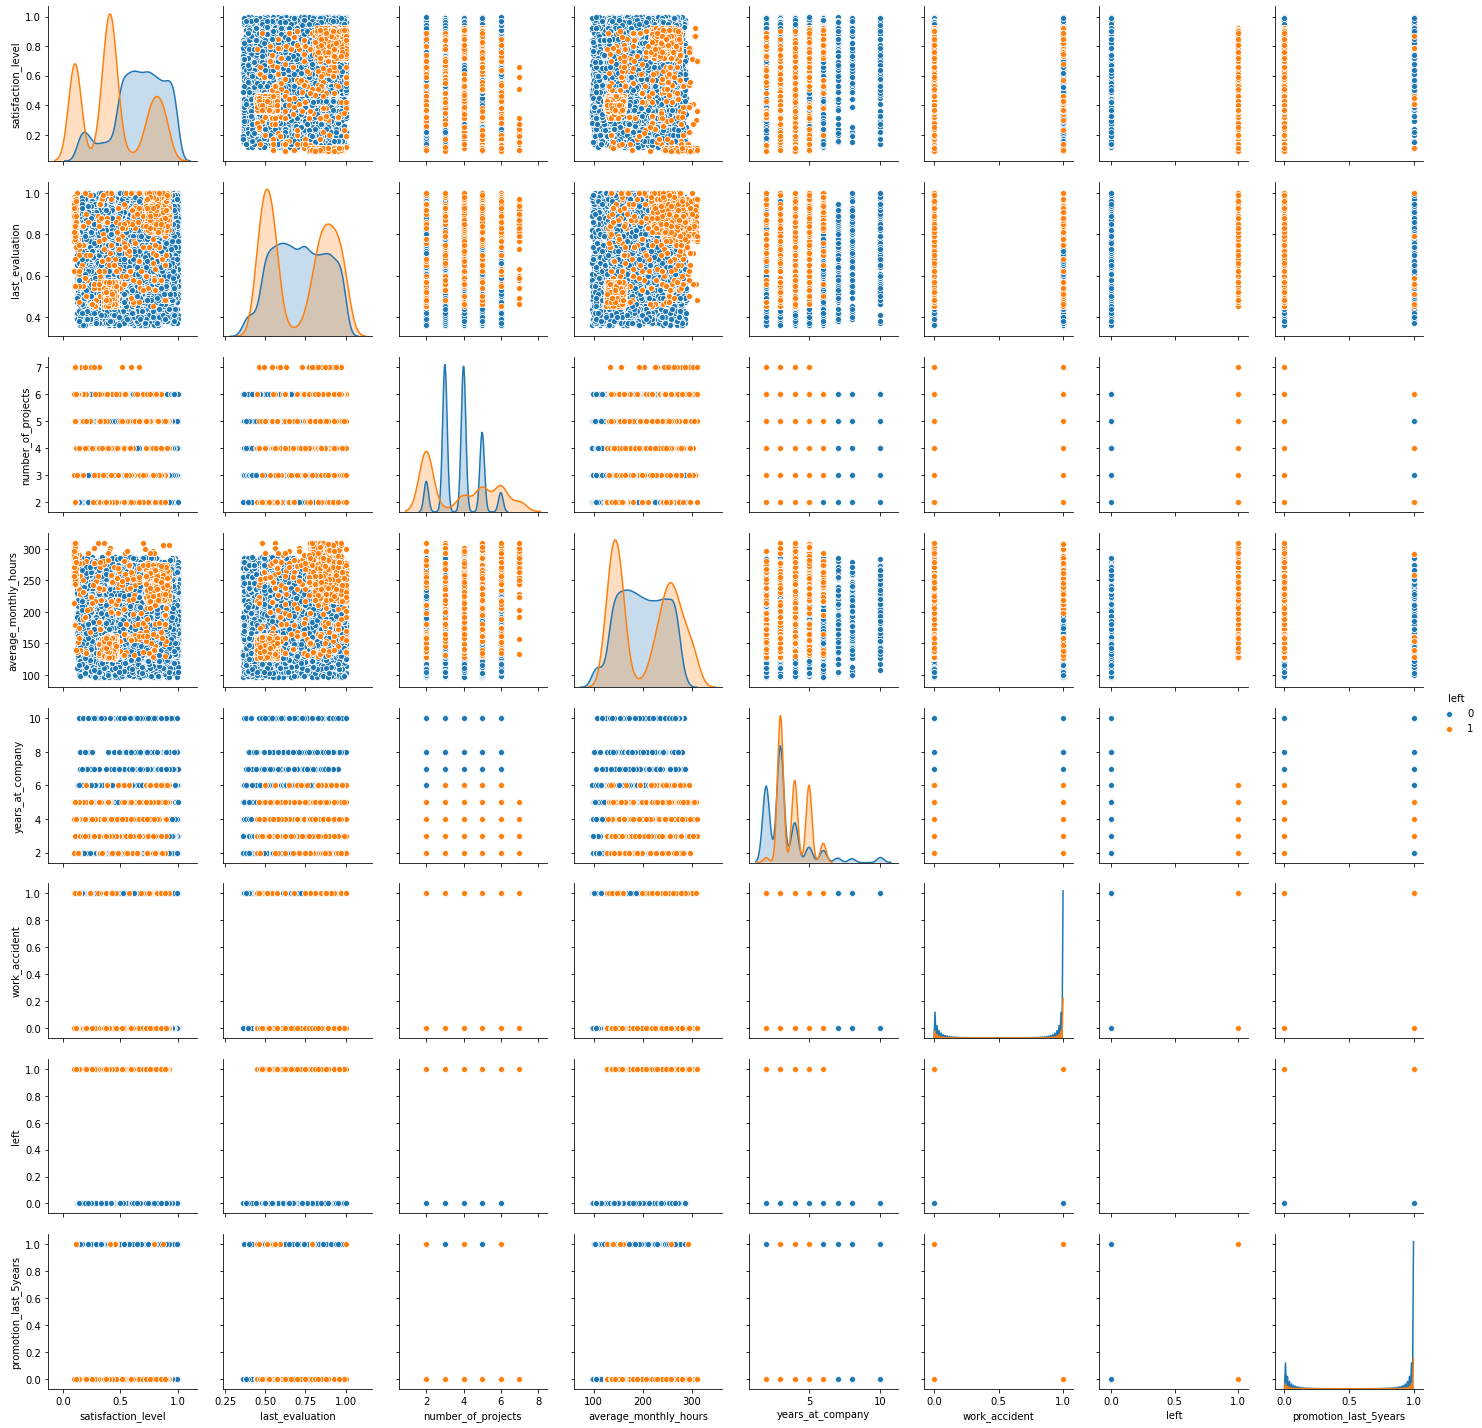

In [4]:
sb.pairplot(data,hue='left')

- Here we have created the pair plot for our understanding and we can take the important variable for our visualization purpose

#### 4.Percentage of employees who left and who are still working.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

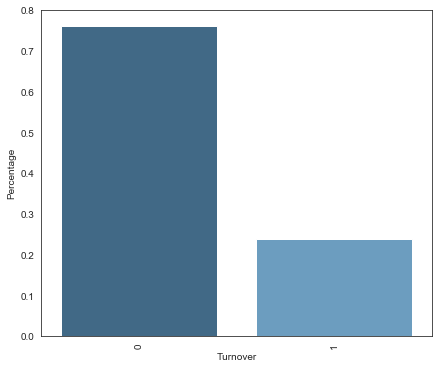

In [19]:
# % of employees left organisation
perc=data['left'].value_counts()/len(data)
perc=perc.reset_index()
perc.columns=['Turnover','Percentage']
plt.figure(figsize=(7,6))
sb.barplot(y='Percentage',x='Turnover',data=perc,palette ='Blues_d')
plt.xticks(rotation=90)

### Distribution for Last_evaluation ,Number of projects,Satisfaction level & Average monthly hours.

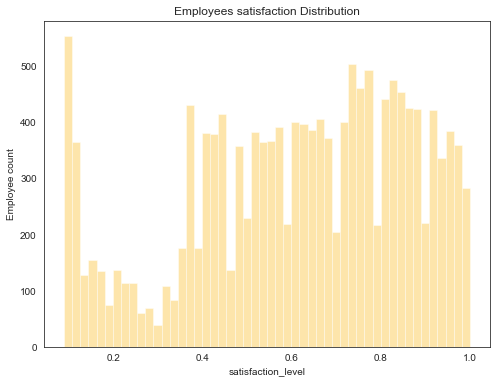

In [20]:
# plot of employees satisfaction
plt.figure(figsize=(8, 6))
sb.distplot(data['satisfaction_level'], bins=50, hist=True, kde=False, color='#fbc02d').set_title('Employees satisfaction Distribution')
plt.ylabel('Employee count')
plt.show()

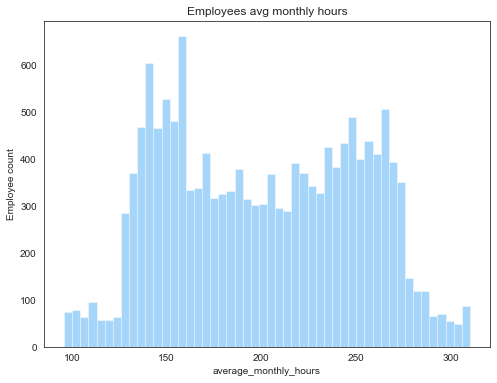

In [21]:
# plot of employees avg monthly hours
plt.figure(figsize=(8, 6))
sb.distplot(data['average_monthly_hours'],bins=50, hist=True, kde=False,color='#2196f3').set_title('Employees avg monthly hours')
plt.ylabel('Employee count')
plt.show()

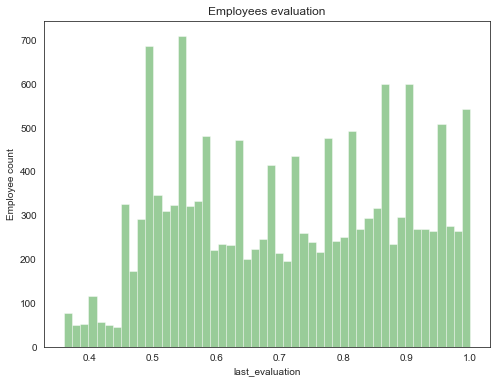

In [22]:
# plot of employees evaluation
plt.figure(figsize=(8, 6))
sb.distplot(data['last_evaluation'],bins=50, hist=True, kde=False,color='g').set_title('Employees evaluation')
plt.ylabel('Employee count')
plt.show()

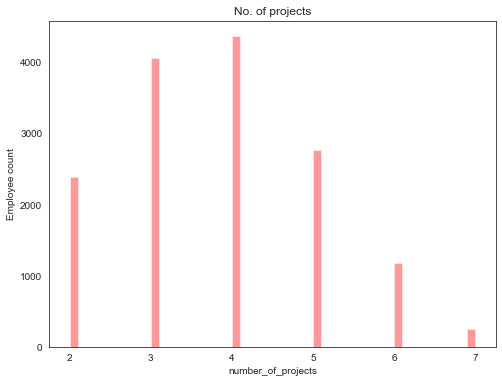

In [23]:
# plot of employees no. of projects
plt.figure(figsize=(8, 6))
sb.distplot(data['number_of_projects'],bins=50, hist=True, kde=False,color='r').set_title('No. of projects')
plt.ylabel('Employee count')
plt.show()

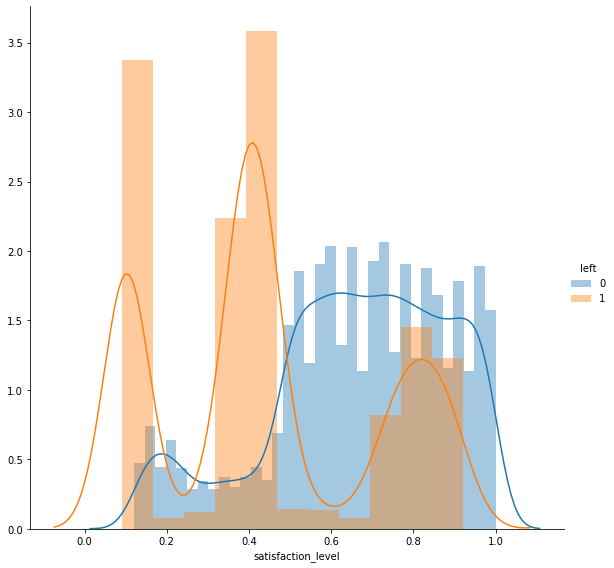

In [20]:
sb.FacetGrid(data, hue="left",size=8).map(sb.distplot, "satisfaction_level").add_legend()
plt.show()

#### 5.Employees left company in each department vs Not left.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

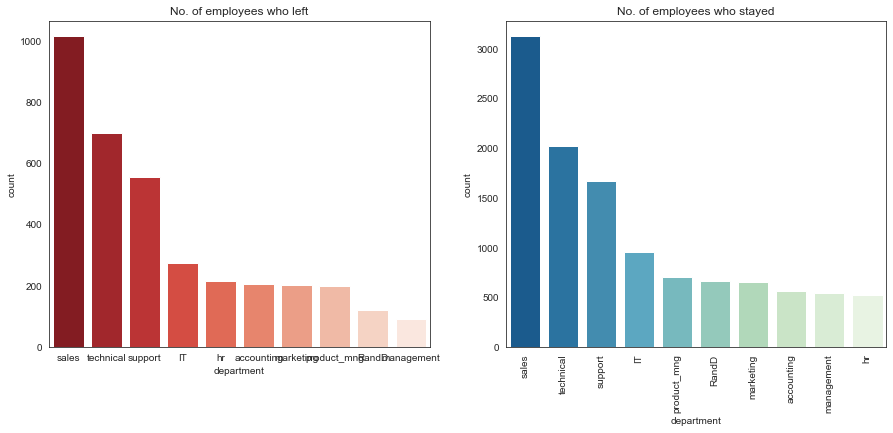

In [24]:
# Setup figures
f,axes=plt.subplots(ncols=2,figsize=(15,6))
left=data[data['left']==1]
dept=left.groupby('left')['department'].value_counts().rename('count').reset_index()
dept=pd.DataFrame(dept)
sb.barplot(x='department',y='count',data=dept,palette ='Reds_r',ax=axes[0]).set_title('No. of employees who left')
plt.xticks(rotation=90)

not_left=data[data['left']==0]
n_dept=not_left.groupby('left')['department'].value_counts().rename('count').reset_index()
n_dept=pd.DataFrame(n_dept)
sb.barplot(x='department',y='count',data=n_dept,palette ='GnBu_r',ax=axes[1]).set_title('No. of employees who stayed')
plt.xticks(rotation=90)

- Employees working in sales and technical department left more.
  - Sales department person may have got better oppertunity since they have better contacts?Or due to overwork they left?
  - Person working in Technical department micht have left due to "Hardwork and overwork"?Increment is also low in this department.

<Figure size 720x432 with 0 Axes>

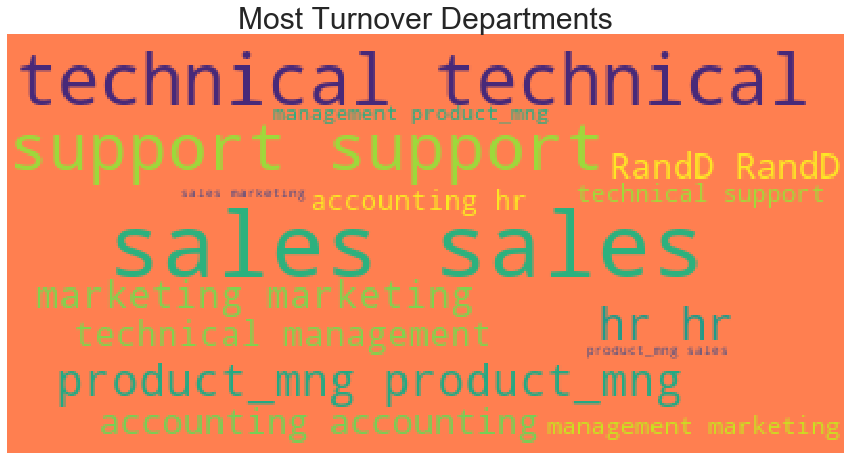

In [25]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in left.department)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=20, background_color="coral").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud)
plt.title('Most Turnover Departments',fontsize = 30)
plt.axis("off")
plt.show()

#### 6.Employees left company with their level of salary.


(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

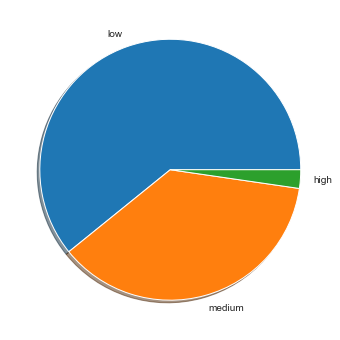

In [92]:
sal=left.groupby('left')['salary'].value_counts().rename('count').reset_index()
sal=pd.DataFrame(sal)
plt.rcParams["figure.figsize"] = (12,6)
plt.pie(sal['count'],labels=sal['salary'],shadow=True)
plt.xticks(rotation=90)

- From this we can say that most of employees who left were having low salary.

#### 7.Total No of project employees working(Left vs Not Left).

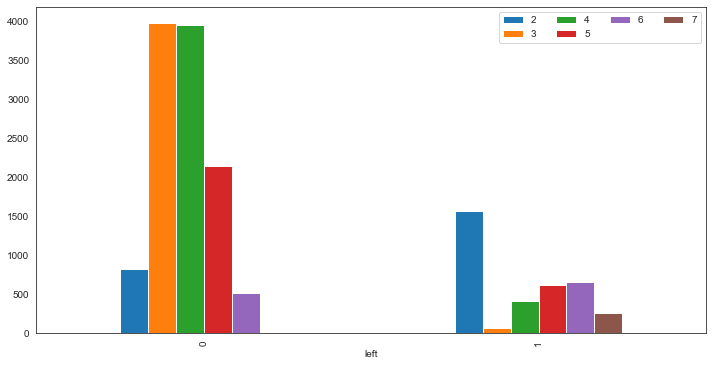

In [91]:
proj=data.groupby('left')['number_of_projects'].value_counts().unstack()
plt.rcParams["figure.figsize"] = (12,6)
proj.plot(kind='bar')
plt.legend(loc='upper right',ncol=4)
plt.show()

#### 8.When do employees leave most(years at company).

Text(0.5, 1.0, 'years_at_company vs Turnover_Rate')

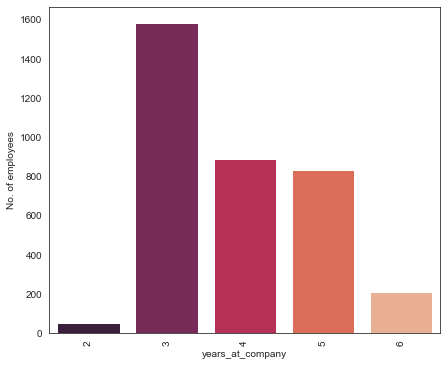

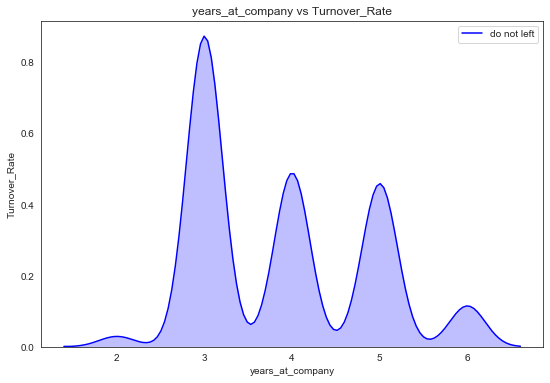

In [28]:
lf=left.groupby('left')['years_at_company'].value_counts().reset_index(name='No. of employees')
plt.figure(figsize=(7,6))
sb.barplot(x='years_at_company',y='No. of employees',data=lf,palette ='rocket')
plt.xticks(rotation=90)
plt.figure(figsize=(9,6))
sb.kdeplot(data.loc[data['left']==1,'years_at_company'],color='b',shade=True,label='do not left')
plt.xlabel('years_at_company')
plt.ylabel('Turnover_Rate')
plt.title('years_at_company vs Turnover_Rate')

#### 9.Satisfaction level according to levelof salary and department.

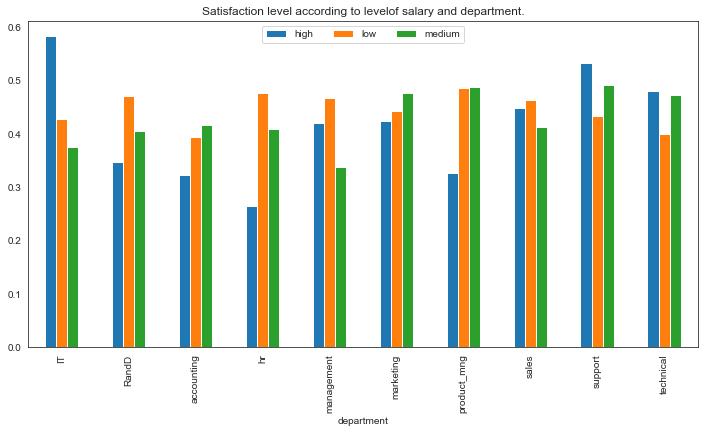

In [93]:
# Average Satisfaction level in each department as per level of salary.
s_level=left.groupby(['department','salary'])['satisfaction_level'].mean().unstack()
plt.rcParams["figure.figsize"] = (12,6)
s_level.plot(kind='bar')
plt.title('Satisfaction level according to levelof salary and department.')
plt.legend(loc='upper center',ncol=4)
plt.show()

- Here we can conclude that employees satisfaction level do not depends on level of salary 
- But for some of them it is true.
  - In IT Dept there is higher satisfaction who are having higher salary and vice vaersa
  
#### (i).High salary low satisfaction level    
- In some departments(i.e:-RandD,Accounting,product_mng,hr) we can see that persons with higher salary are less satisfied when compared to low and medium salary person.
  - This may be because of workload.
  - They may not be intrested in working in that department(intrest of person might be differnt).
  - Team they are working with or any other reasons.
  
#### (ii).Low salary high satisfaction level  
- In some departments(i.e:- RandD,HR,sales) we can see that persons with low salary are more satisfied when compared to higher and medium salary persons.
  - This may be because that person is loving his work(this might be his field of intrest).
  - His Team mates is very helpful and kind.

#### 10.Avg working hour of each department according to their salary.

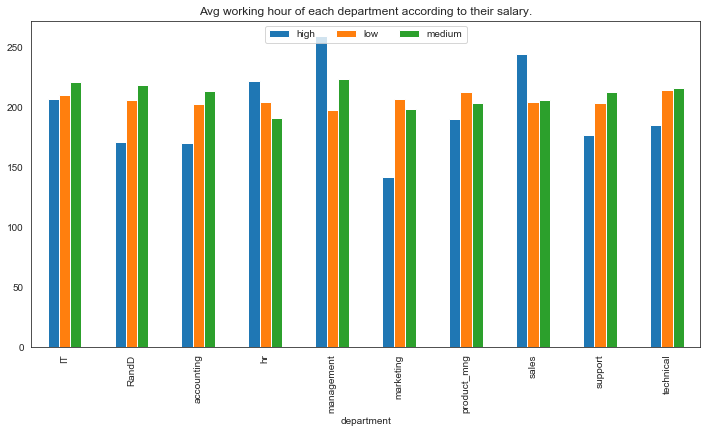

In [94]:
# Avg working hour of each department according to their salary.
work_hr=left.groupby(['department','salary'])['average_monthly_hours'].mean().unstack()
plt.rcParams["figure.figsize"] = (12,6)
work_hr.plot(kind='bar')
plt.title('Avg working hour of each department according to their salary.')

plt.legend(loc='upper center',ncol=4)
plt.show()

- Here we can see that salary do not depends on no. of working hours.

#### 11.Salary in each department as per their evaluation.


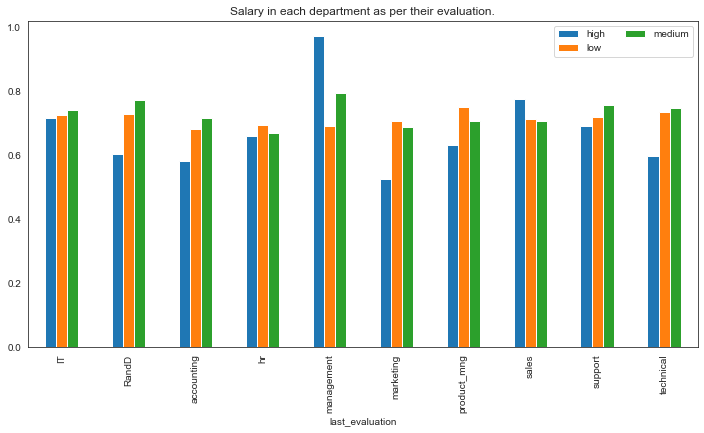

In [95]:
e_level=left.groupby(['department','salary'])['last_evaluation'].mean().unstack()
plt.rcParams["figure.figsize"] = (12,6)
e_level.plot(kind='bar')
plt.xlabel('last_evaluation')
plt.title('Salary in each department as per their evaluation.')
plt.legend(loc='upper right',ncol=2)
plt.show()

- Here we can see that salary do not depends on no. of last evaluation.

#### High evaluation high salary:
- This can be seen that employees in some departments(i.e:-Mangement,Sales) they worked harder and they were rewarded with high salary according to their evaluation.

#### Low evaluation high salary:
- This can be seen that employees in some departments(i.e:-RandD,accounts,marketing,technical) they are not working harder and they are  given high salary according to their evaluation.

#### 11.Satisfaction and Evaluation

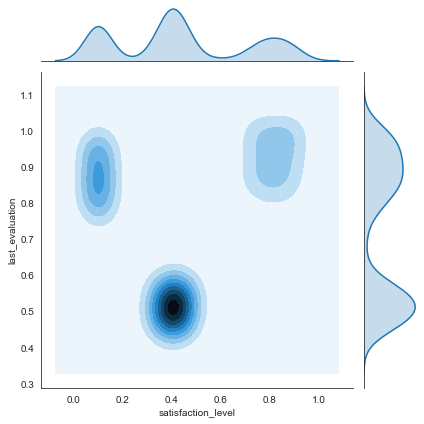

In [32]:
sb.jointplot(x=left['satisfaction_level'],y=left['last_evaluation'],kind='kde')

- There are 3 cluster for employees who left company.
#### Cluster 1(Hard working and Sad employees):
- Satisfaction was below 0.2 and evaluation were greater 0.75.Which colud be good indication that employees who left the company were good but felt terrible at their work.
  - This  colud be because "overwork".
  - Working too hard.

#### Cluster 2(Bad and Sad employees):
- Satisfaction between 0.35-0.45 and evaluation below 0.58.This could be seen as employees who are badly evaluated and felt bad at work.
  - This colud be because employees who "underperform".

#### Cluster 3(Hard working and Happy employees):
- Satisfaction between 0.7-11.00 and evaluation grater than 0.80.Which could mean that employees in cluster were "ideal".They loved their work and were evaluated highly for their performance.
  -  Reason may be they found better opportuniyu.

#### 12.Checking outliars by boxplot.

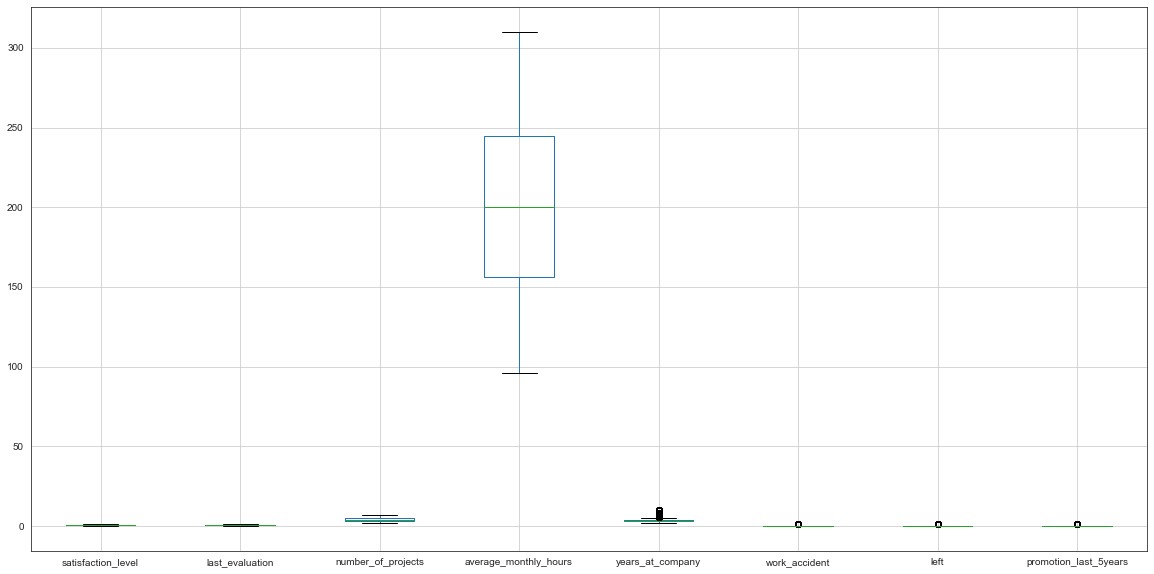

In [33]:
plt.figure(figsize=(20,10))
data.boxplot()

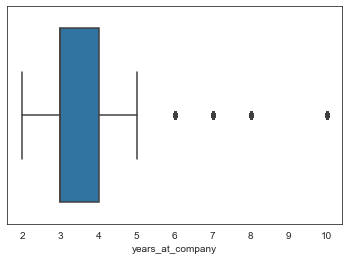

In [34]:
# From above boxplot we can clearly see that there is outliar in "years_at_company" column.  
sb.boxplot(data['years_at_company'])

#### 13.Checking outliars for satisfaction level in each departments.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

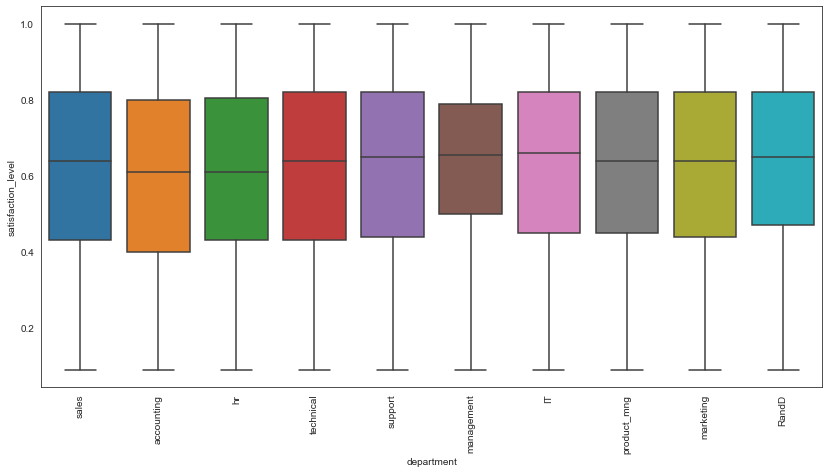

In [35]:
plt.figure(figsize=(14,7))
sb.boxplot(data['department'],data['satisfaction_level'])
plt.xticks(rotation=90)

#### 14.Checking outliars for Last Evaluation in each departments.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

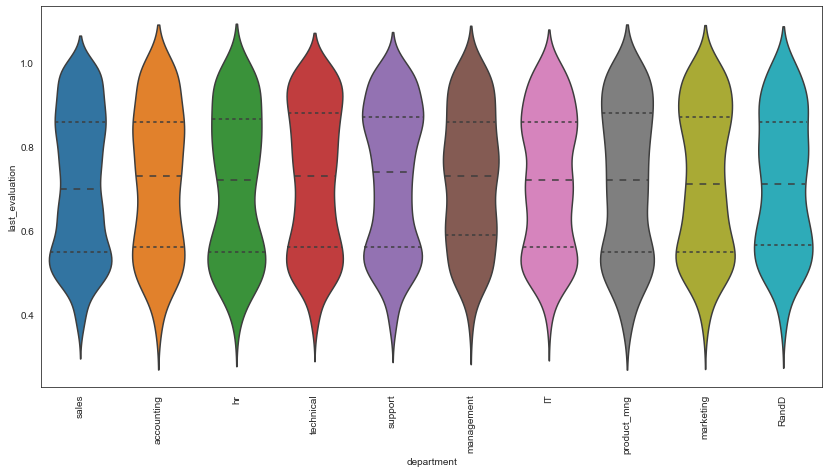

In [36]:
plt.figure(figsize=(14,7))
sb.violinplot(data['department'],data['last_evaluation'],inner='quartile')
plt.xticks(rotation=90)


#### 15.Checking outliars for no. of projects in which employees are woking in each departments.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

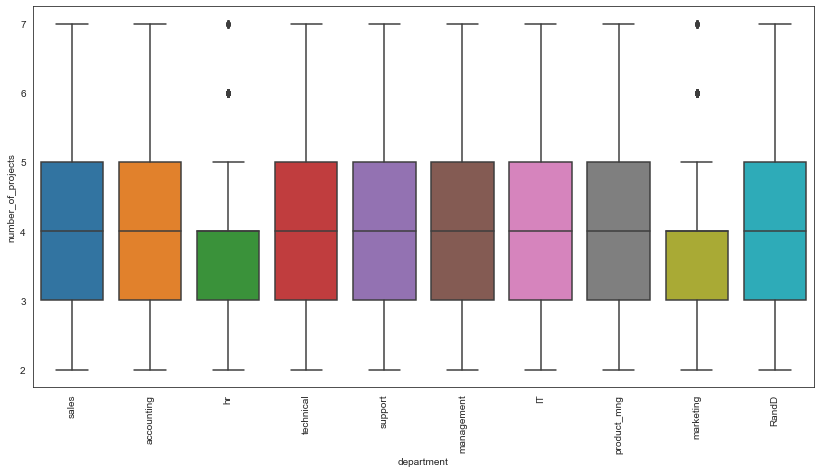

In [37]:
plt.figure(figsize=(14,7))
sb.boxplot(data['department'],data['number_of_projects'])
plt.xticks(rotation=90)

#### 16.Checking outliars for avg. working hours by employees are woking in each departments.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

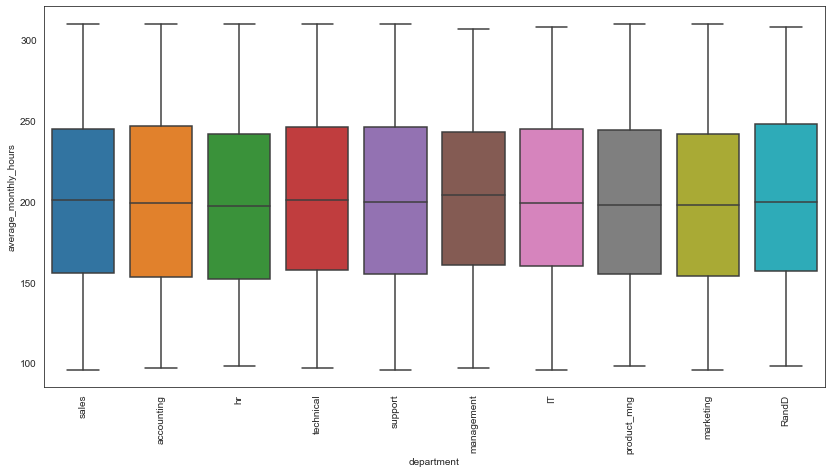

In [38]:
plt.figure(figsize=(14,7))
sb.boxplot(data['department'],data['average_monthly_hours'])
plt.xticks(rotation=90)

#### 17.Employee Satisfaction

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Left vs Do Not Left')

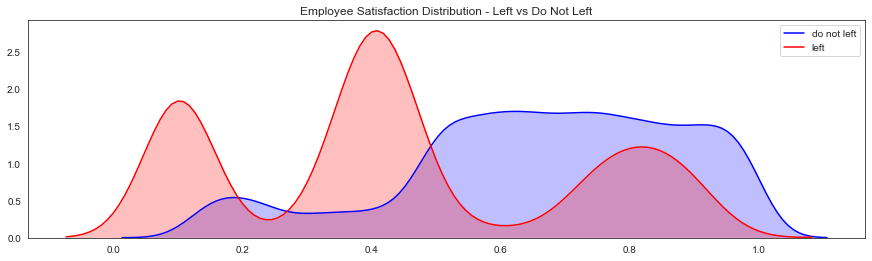

In [39]:
# KDE plot: 
plt.figure(figsize=(15,4))
ax=sb.kdeplot(data.loc[data['left']==0,'satisfaction_level'],color='b',shade=True,label='do not left')
ax=sb.kdeplot(data.loc[data['left']==1,'satisfaction_level'],color='r',shade=True,label='left')
plt.title('Employee Satisfaction Distribution - Left vs Do Not Left')

- There is tri-modal distribution for employees that left.

- Employees who had really low satisfactionlevel(0.2 or less) left company more.
- Employees who had low satisfactionlevel(0.3-0.5) left company more.
- Employees who had really high satisfactionlevel(0.7 or more) left company more.

In [82]:
def plot_scatter_chart(df, dept):
    low__level = df[(df.department == dept) & (df.left == 0)]
    high__level = df[(df.department == dept) & (df.left == 1)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(low__level.satisfaction_level,low__level.last_evaluation,color = 'blue',label = 'low')
    plt.scatter(high__level.satisfaction_level,high__level.last_evaluation,color = 'green',label = 'high')
    plt.legend()
    plt.xlabel('satisfaction level')
    plt.ylabel('last evaluation')

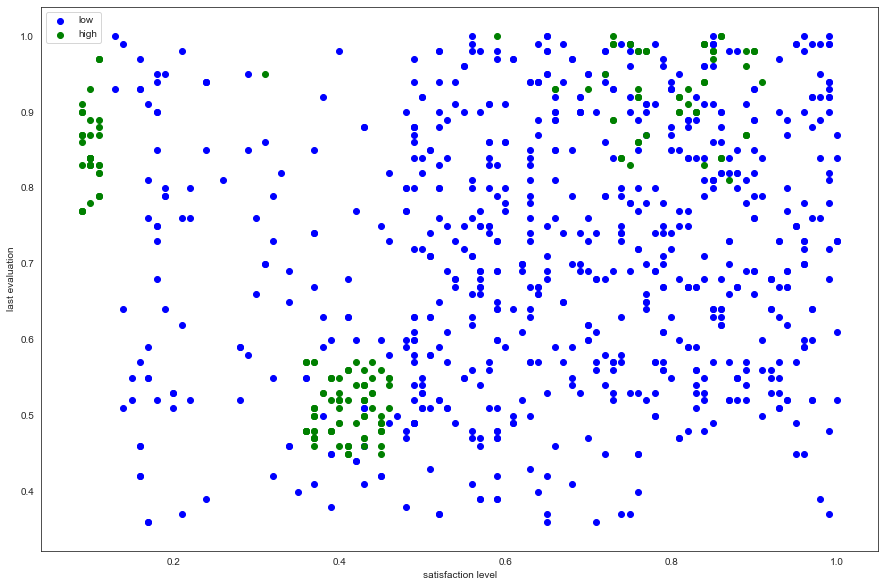

In [85]:
plot_scatter_chart(data, 'product_mng')

In [76]:
data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

## C.  Hypothesis Testing

#### 1.Hypothesis Testing for checking difference in Satisfaction level of employees who left and who are still working.


- NULL HYPOTHESIS: Mean of Satisfaction level of employees who left=Mean of Satisfaction level of employees who do left.
- ALTERNATE HYPOTHESIS: Mean of Satisfaction level of employees who left is not equal to Mean of Satisfaction level of employees who do left.

In [40]:
import scipy
n_left=data[data['left']==0]                     #satisfaction level of employees who didn't left
n_left_satis=n_left['satisfaction_level']        #satisfaction level of employees who didn't left
left_satis=left['satisfaction_level']
stat, p=scipy.stats.ks_2samp(n_left_satis,left_satis)  
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.564, p=0.000


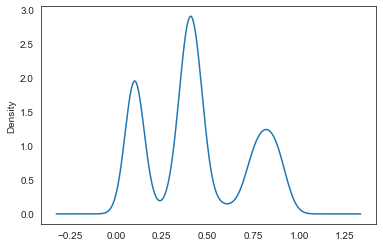

In [41]:
left['satisfaction_level'].plot.density()

- Here p-value is 0.0 kstest for two samples which is less than statistic= 0.5642078239448236 value so we reject Null hypothesis and we have to continue to check if there is difference in satisfaction level of employees who left and who do not left with non parametric test.
- From above density graph we can see that satisfaction level do not follow normal distribution(It is a tri modal distribution).
- Mannwhitney U test is alternative for independent sample t-test with same population variances.

In [42]:
stat,p=scipy.stats.mannwhitneyu(n_left_satis, left_satis,alternative='less')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=30522915.000, p=1.000
Same distribution (fail to reject H0)


- So here we can see that p-value is 1.000 which is higher when compared to significance level which mean there is difference in satisfaction level of employees who left and who do not left with non parametric test.
- This implies that Satisfaction level who left is less than who are still working in company.

#### 2.Hypothesis Testing for checking difference in Evaluation points of employees who left and who are still working.

- NULL HYPOTHESIS: Mean of Evaluation points of employees who left=Mean of Evaluation points of employees who do left.
- ALTERNATE HYPOTHESIS: Mean of Evaluation points of employees who left is not equal to Mean of Evaluation points of employees who do left.

In [43]:
n_left_satis=n_left['last_evaluation']        #Evaluation of employees who didn't left
left_satis=left['last_evaluation']
stat, p=scipy.stats.ks_2samp(n_left_satis,left_satis)  
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.213, p=0.000


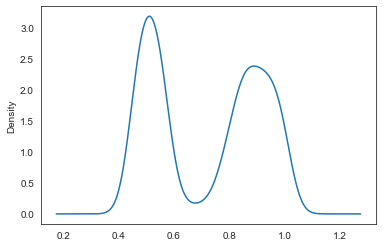

In [44]:
left['last_evaluation'].plot.density()

- Here p-value is 0.0 kstest for two samples which is less than statistic= 0.213 value so we reject Null hypothesis and we have to continue to check if there is difference in satisfaction level of employees who left and who do not left with non parametric test.
- From above density graph we can see that enmployees "Evaluation"  do not follow normal distribution(It is a tri modal distribution).
- Mannwhitney U test is alternative for independent sample t-test with same population variances.

In [45]:
stat,p=scipy.stats.mannwhitneyu(n_left_satis, left_satis,alternative='less')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=20472187.000, p=0.617
Same distribution (fail to reject H0)


- So here we can see that p-value is 0.617 which is higher when compared to significance level which mean there is difference in last evaluation score of employees who left and who do not left with non parametric test.
- This implies that last evaluation score who left is less than who are still working in company.

## D.   Data Pre-Processing

In [46]:
# Importing Library for pre-processing
le=LabelEncoder()
# creating deep copy of our data
data1=data.copy(deep=True)

In [47]:
# here salary is ordinal data so we can apply LabelEncoder() to convert it to numeric
data1['salary']=le.fit_transform(data1['salary'])
data1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [48]:
# here department is nominal data so we can apply getdummies() to convert it to numeric
data1=pd.get_dummies(data1,drop_first=True)
data1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


## E.   Develop a Machine Learning algorithm.

In this classification problem we have two classes 0 & 1(left or not left) so for such kind of problem we can use:
- KNN Classifier
- Logistig Regression(Classification)
So we will apply both the classifiers and choose best model for optimization.


#### Recall or Precision?

- It depends on how much cost we want which depends on types of error:(1)False Positive or (2)False Negative
- In this case we do not want our cost too much so to avoid this situtation we have to focus on reducing type 2 error false negative and to minimise it we have to optimize "Recall". 

#### Optimize recall :
- By limiting false negative
- We will get more false positives.


In [49]:
# Creating x & y data for ML algorithm
x=data1.drop('left',axis=1)
y=data1.left

In [50]:
# splitting data into training(x_train,y_train) and test set(x_test,y_test)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [51]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 1.Knn-Classification

In [52]:
k_list=[]
for i in range(1,31):
    k_list.append(i)
mis_cls=[]
for i in k_list:
    knn=KNeighborsClassifier(n_neighbors=i)  
    knn.fit(x_train,y_train)    
    y_pred=knn.predict(x_test)  
    cm=confusion_matrix(y_test,y_pred)
    mis_cls.append(sum(y_pred!=y_test)) 

In [53]:
# mis_cls           # here output for misclassification is:
#[92,107,148,150,172,152,163,158,167,163,179,169,179,172,182,183,189,189,191,186,193,188,195,189,196,194,198,197,198,199]

Text(0, 0.5, 'Total Error')

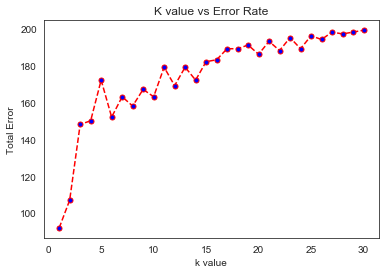

In [54]:
plt.plot(k_list,mis_cls,color='red',linestyle='dashed',marker='o',
         markerfacecolor='blue',markersize=5)
plt.title('K value vs Error Rate')
plt.xlabel('k value')
plt.ylabel('Total Error')

- From above graph we can see that best k-value for our model is 1 or 2.
- So we choose k value=1 for our model for best result.

In [55]:
knn=KNeighborsClassifier(n_neighbors=1)  # KNeighborsClassifier is name of a class and n_neighbors is parameter
knn.fit(x_train,y_train)    # fit function is used to make model learn from training data-it compute euclidean distance internally
y_pred=knn.predict(x_test)  # It predict size of tshirt by checking data in training set

In [56]:
y_test

1670     1
13378    0
10233    0
4719     0
7003     0
        ..
14035    0
8469     0
12453    1
9431     0
4202     0
Name: left, Length: 3000, dtype: int64

In [57]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
# Making the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix is:',cm,sep='\n')
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).reshape(-1)   #ravel()
print('True negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)

Confusion Matrix is:
[[2233   66]
 [  26  675]]
True negative 2233
false positive 66
false negative 26
true positive 675


- Here our KNN classifier model has mis-classified for 92 times.
- False positive mis-classification is 66.

In [59]:
knn_score=roc_auc_score(y_test,y_pred)
print('Accuracy:',knn_score)
knn_report=classification_report(y_test,y_pred)
print(knn_report)

Accuracy: 0.9671009972083625
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2299
           1       0.91      0.96      0.94       701

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



- Knn accuracy rate is 0.9671009972083625.
- Recall is 0.97 in this case.

In [60]:
 # Computing probability for the class
probs_knn=knn.predict_proba(x_test)
probs_knn

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

- So here probs_knn(probability of classifying) is mostly 0 and 1 which means that our model is very accurate in classification whether  employee will leave of not.

In [61]:
#keep Probabilities of the positive class only
prob_positive_knn=probs_knn[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive_knn)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve: ',roc_auc)

Area under the curve:  0.9671009972083625


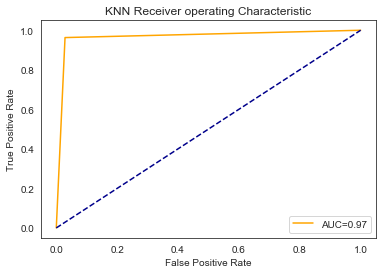

In [62]:
# plot ROC curve 
plt.title('KNN Receiver operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### 2.Logistic regression

In [63]:
# filter out the employees who left.
left=data.loc[y==1]

# filter out the employees who did not left.
not_left=data.loc[y==0]

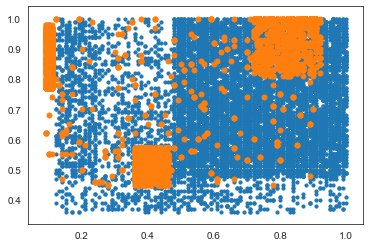

In [64]:
plt.scatter(not_left.iloc[:,0],not_left.iloc[:,1],s=10,label='Not left')
plt.scatter(left.iloc[:,0],left.iloc[:,1],s=25,label='left')
plt.show()

In [65]:
# Fitting logistic regression to training set
regressor=LogisticRegression()
regressor=regressor.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
y_pred=regressor.predict(x_test)
print(y_pred)
#print(y_test)

[0 0 0 ... 0 0 1]


In [67]:
# Computinng confusion matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix is: ',cm,sep='\n')
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).reshape(-1)   #ravel()
print('True negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)

Confusion matrix is: 
[[2120  179]
 [ 527  174]]
True negative 2120
false positive 179
false negative 527
true positive 174


- Here bayes classifier model has mis-classified for 706 times.
- False positive mis-classification is 527.

In [68]:
logistic_score=roc_auc_score(y_test,y_pred)
print('Accuracy:',logistic_score)
logistic_report=classification_report(y_test,y_pred)
print(logistic_report)

Accuracy: 0.5851784469958097
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2299
           1       0.49      0.25      0.33       701

    accuracy                           0.76      3000
   macro avg       0.65      0.59      0.59      3000
weighted avg       0.73      0.76      0.73      3000



- Logistic regression accuracy rate is 0.5851784469958097.
- Recall for leaving company is 0.25 in this case which is very low when compared to knn and bayes.

In [69]:
 # Computing probability for the class
probs_logistic=regressor.predict_proba(x_test)
probs_logistic

array([[0.6396885 , 0.3603115 ],
       [0.69200372, 0.30799628],
       [0.95652678, 0.04347322],
       ...,
       [0.6873486 , 0.3126514 ],
       [0.80572856, 0.19427144],
       [0.29558862, 0.70441138]])

- So here probs_logistic(probability of classifying) is mostly in decimal which means that our model is not very accurate in classification whether  employee will leave of not when compared to knn-classifier.

In [70]:
#keep Probabilities of the positive class only
prob_positive_logistic=probs_logistic[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive_logistic)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve: ',roc_auc)

Area under the curve:  0.8099496214629075


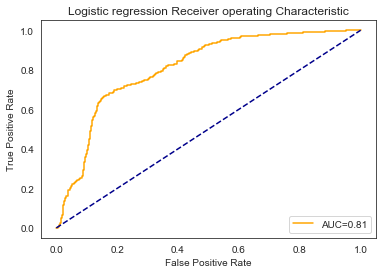

In [71]:
# plot ROC curve 
plt.title('Logistic regression Receiver operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Model selection:
 Accuracy for models: 
- 1.Knn - 97%
- 2.Logistic - 76%
 
Recall:-
- 1.Knn - 97%
- 2.Logistic - 59%

Precision:-
- 1.Knn- 95%
- 2.Logistic- 65%

Area under creve:-
- 1.Knn- 97%
- 2.Logistic- 81%

So from above results we can say that performance of Knn classifier is better when compared to Logistic regression.

## Conclusion(By 5 Why):

### The Root Causes of High Attrition: 

##### Cause 1: Not hiring the right people.

Recruiting and hiring the wrong people will cost you more than investing in your employees will. More than that, a revolving door of employees coming in and out can have a huge negative impact on the morale of your employees.
The process of recruiting and hiring an employee needs to be more honest, a “Right Fit” focus. Be honest about the job in your advertisement, this leads to a more authentic and true relationship. Be realistic about what you expect from your candidate and explain what the job is like.

##### Cause 2:Boredom or Better Oppertunity
On the other hand, a lack of challenging or engaging work is also a major cause of employee turnover. In other words, boredom or Better oppertunity.It’s no wonder boredom can drive employees to look for new work.
Employees grow bored with their work for a number of different reasons. If they feel that their capabilities are underused or their job lacks meaning, boredom can set in. But so can a mismatch between their interests and the type of work they do or company they work for. In some cases, bored employees are more stressed than overworked employees.


##### Cause 3: Lack of growth and advancement opportunities is a reason for Attrition(Salary).
When companies do not offer advancement and developmental opportunities for capable and ambitious workers, they end up losing talented employees and retaining poor performers (also known as the “dark side” of retention).  Offering upward professional mobility is one method to help motivate some high-performing employees to stick around longer.


##### Cause 4: Inaccurate job profiles contribute to job Turnover and Attrition rate.
Job descriptions identify the skills necessary for a position, as well as what kind of environment candidates should expect. If an employer has not taken the time to construct a hiring profile that truthfully outlines the details of the job, they run the risk of disappointing qualified candidates by not delivering on their promises, or hiring candidates who do not have the proper skill-set to be successful in the position. 


##### Cause 5:Performance Pressure.
Surrounded by high performing indivisual and vvery demanding manager puts immense pressure on young professionals who can not cope with it.Changing jobs every few months they never settele down or contribute,they change jobs to escape failure.





### How to Increase Employee Retention.

##### 1.Track the numbers 
Don't over analyze, agree to a simple format and frequency and keep to it. Call out action items and nail them in real time. Don't let it become an annual project.

##### 2.Responsibility 
Make people managers responsible for retention and engagement of their respective teams. Its essential that the people managers are empowered and enabled to exercise the responsibility.

##### 3.Track quality of hires  
Not quantity of hires! the concept of measuring quality of hires is still new to many companies. If you fix the input, the output takes care of itself. 

##### 4.Provide growth 
An all round view of growth for each individual is needed to ensure relevance. Providing opportunities to grow professionally, economically and socially helps retain talent in the long run. 


#### 5.Retention Plan
We can use probability output of our model to treat each employee accordingly:-
- 1.Safe Zone(Green) - Employee within this zone are considered safe.
- 2.Low Risk Zone(Yellow) - Employee within this zone are to be taken into consideration of potential turnover.
- 3.Medium Risk Zone(Orange) - Employee within this zone are risk turnover.Action should be taken monitored accordingly.
- 4.High Risk Zone(Red) - Employee within this zone are considered have highest chance of turnover.Action should be taken immediately.